<a href="https://colab.research.google.com/github/tahminahasan/Water-Quality/blob/main/Water_quality_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import missingno as msno

In [ ]:
# Load the dataset
df = pd.read_csv('water_potability.csv')
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Check the shape of the dataset
num_samples, num_features = df.shape

# Print the number of samples (rows) and features (columns)
print(f'Number of samples (rows): {num_samples}')
print(f'Number of features (columns): {num_features}')


Number of samples (rows): 3276
Number of features (columns): 10


In [ ]:
# Check for missing values
df.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


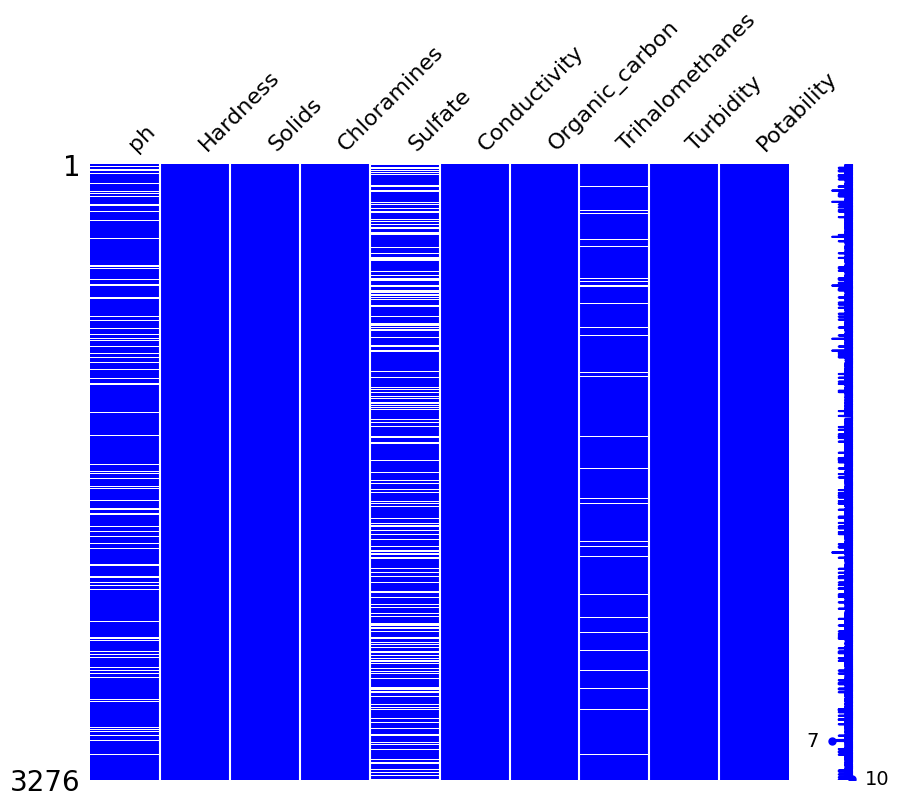

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df, color=(0, 0, 1), figsize=(10, 8))
plt.show()

In [ ]:
# Fill missing values with the mean of each column (numerical values only)
df_imputed = df.fillna(df.mean(numeric_only=True))
df_imputed.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
numeric_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']


In [ ]:
# Calculate the absolute Z-scores for the specified numeric columns to detect outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df_imputed[numeric_cols]))

In [ ]:
# Filter out rows where any feature's Z-score is 3 or more ( remove outliers)
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

Z-score shows how far a value is from the average.

If Z-score is more than 3 or less than -3 → it's an outlier.

z_scores < 3 gives True for normal values, False for outliers.

.all(axis=1) checks if all columns in a row are normal.

We keep only those rows that have no outliers at all.

In [ ]:
print("Original rows:", df.shape[0])
print("Rows after mean imputation:", df_imputed.shape[0])
print("Rows after removing outliers:", df_no_outliers.shape[0])
print("Rows removed as outliers:", df_imputed.shape[0] - df_no_outliers.shape[0])


Original rows: 3276
Rows after mean imputation: 3276
Rows after removing outliers: 3128
Rows removed as outliers: 148


In [ ]:
df_no_outliers.to_csv('cleaned_data.csv', index=False)


In [ ]:
print("Rows in cleaned dataset:", df_no_outliers.shape[0])
print("Columns in cleaned dataset:", df_no_outliers.shape[1])

Rows in cleaned dataset: 3128
Columns in cleaned dataset: 10


In [ ]:
# Load the cleaned dataset
cleaned_df = pd.read_csv('cleaned_data.csv')
cleaned_df.tail(2)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3126,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1
3127,7.874671,195.102299,17404.177061,7.509306,333.775777,327.459760,16.140368,78.698446,2.309149,1


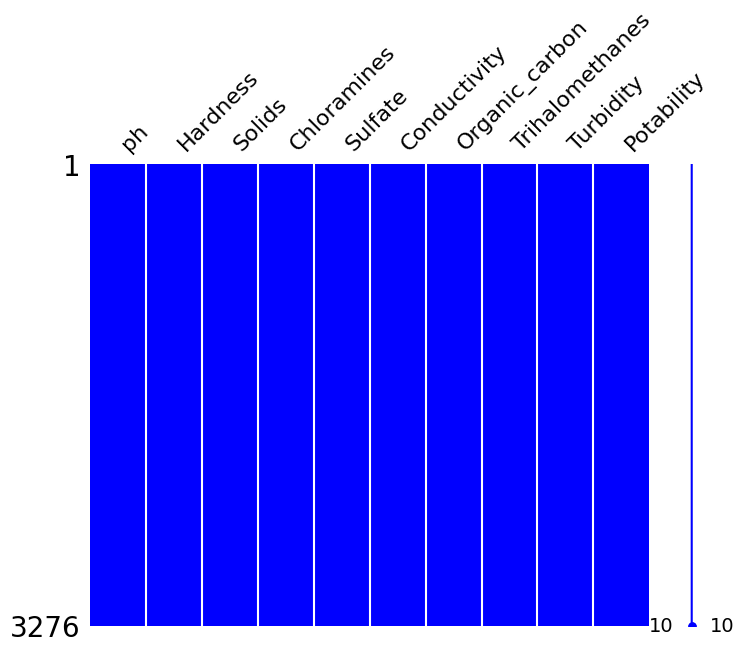

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno

msno.matrix(df_imputed, color=(0, 0, 1), figsize=(8, 6))
plt.show()

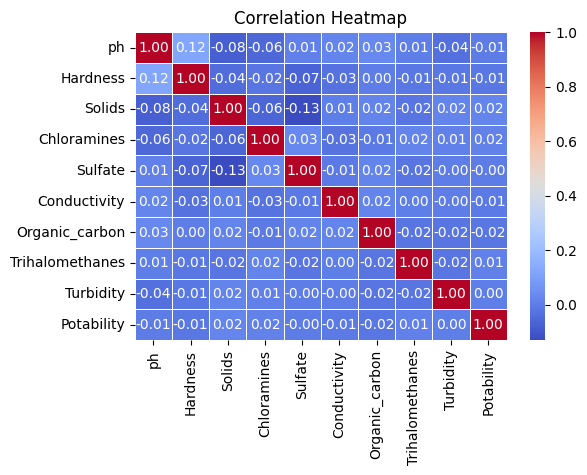

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



Potability Value Counts:
 Potability
0    1930
1    1198
Name: count, dtype: int64


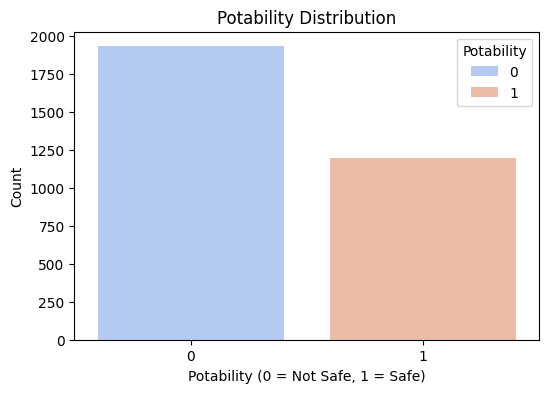

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Check value counts for the target variable (Potability)
potability_counts = df_no_outliers['Potability'].value_counts()
print("Potability Value Counts:\n", potability_counts)

# Create a Seaborn count plot for Potability
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df_no_outliers, palette='coolwarm', hue='Potability')
plt.title('Potability Distribution')
plt.xlabel('Potability (0 = Not Safe, 1 = Safe)')
plt.ylabel('Count')
plt.show()


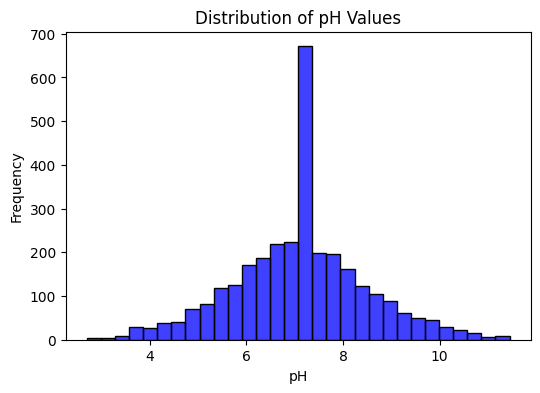

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot the pH values using Seaborn's histplot
plt.figure(figsize=(6,4))
sns.histplot(df_no_outliers['ph'], bins=30, color='blue')
plt.title('Distribution of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

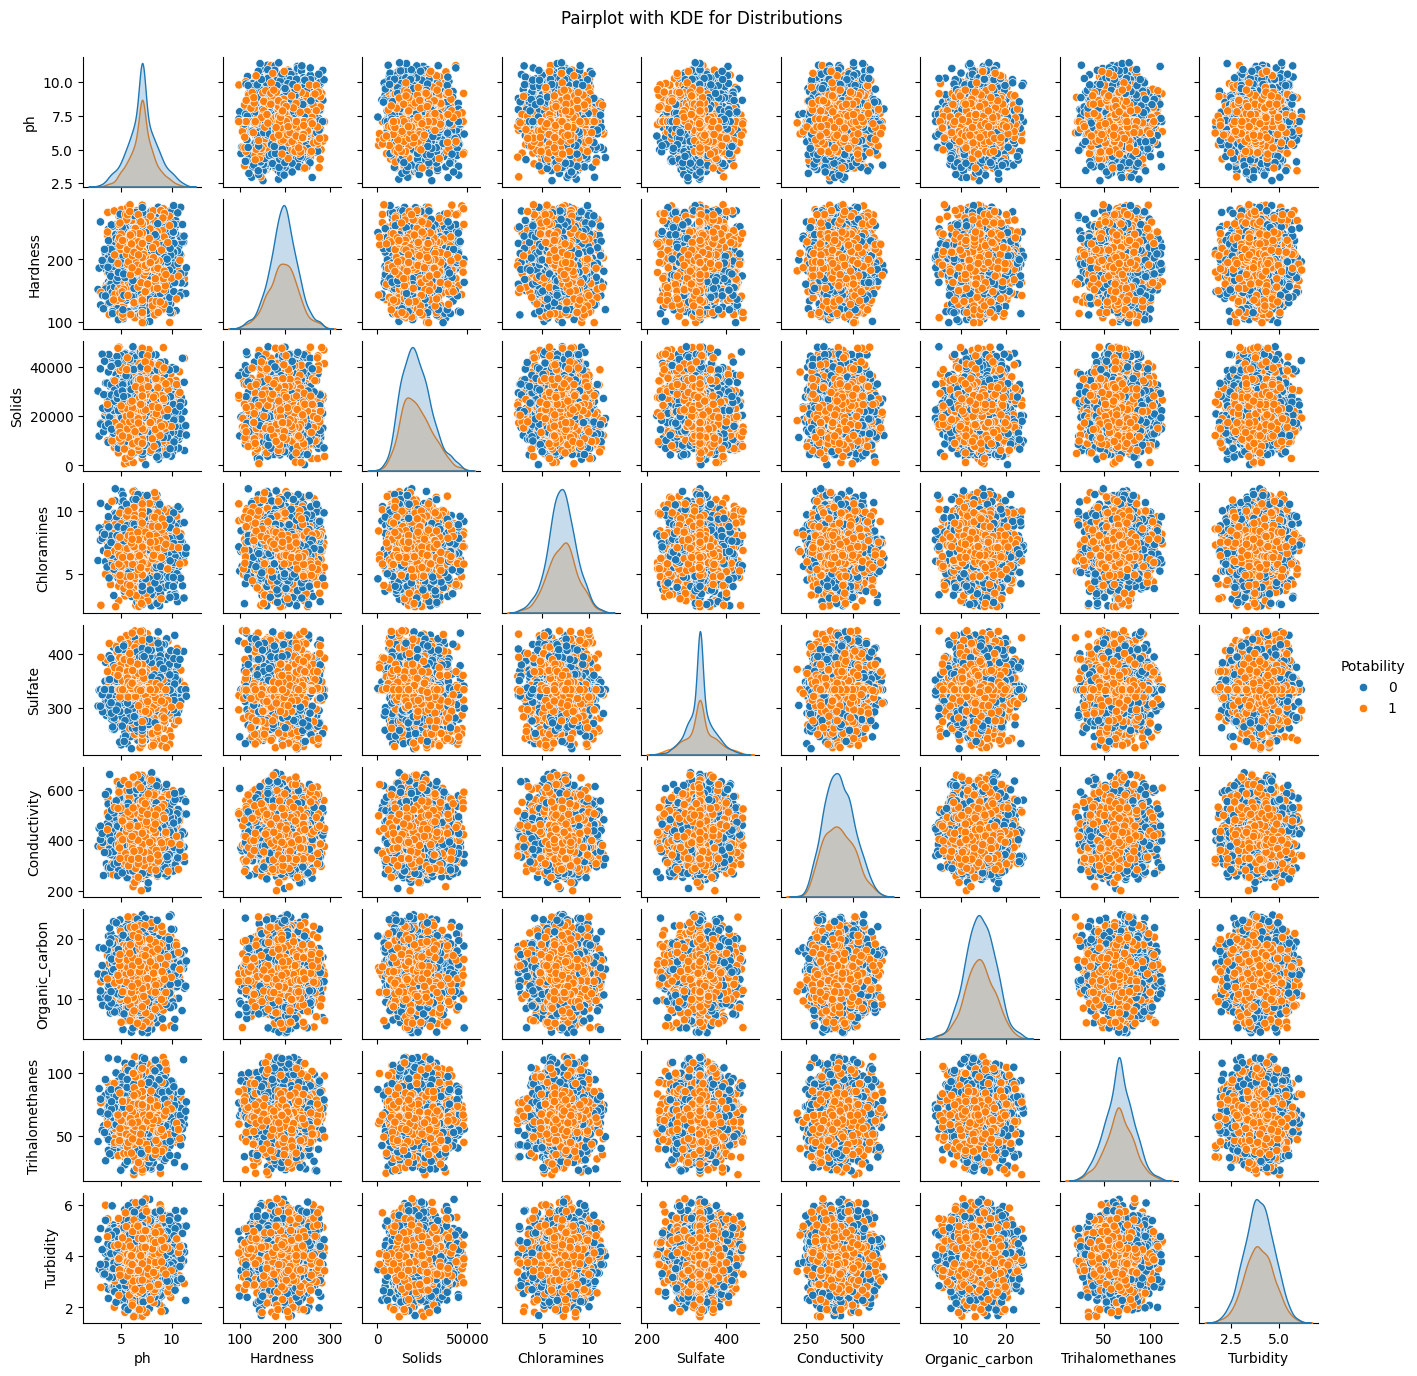

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                     'Conductivity', 'Organic_carbon', 'Trihalomethanes',
                     'Turbidity', 'Potability']

# hue='Potability' colors the points by class (0 = not safe, 1 = safe)
# diag_kind='kde' shows KDE (smooth distribution) on the diagonal
# markers='o' uses circle markers
# height=1.5 sets the size of each subplot for a compact view
sns.pairplot(df_no_outliers[pairplot_features], hue='Potability', diag_kind='kde', markers='o', height=1.5)

plt.suptitle('Pairplot with KDE for Distributions', y=1.02)

plt.show()

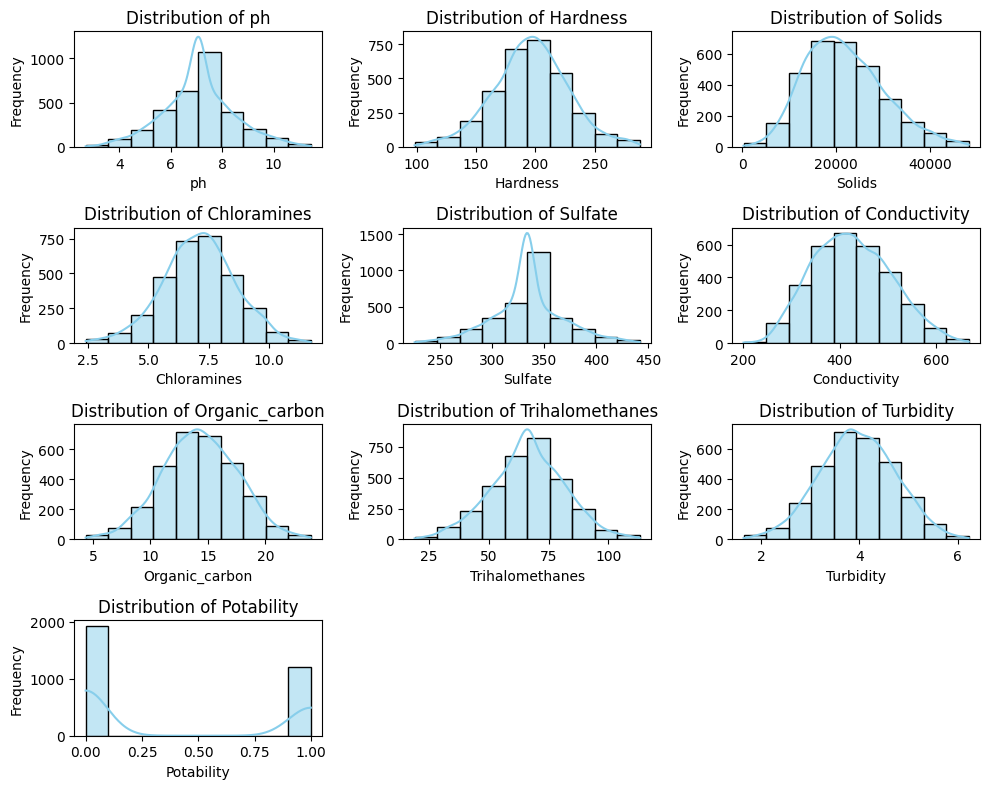

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

water_quality_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                          'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

plt.figure(figsize=(10,8))

# Loop through each feature to create individual histograms
for i, feature in enumerate(water_quality_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_no_outliers[feature], kde=True, bins=10, color='skyblue')
    plt.title(f'Distribution of {feature}')  # Add title to each plot
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlapping elements
plt.tight_layout()

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_no_outliers.drop(columns='Potability')  # Independent variables
y = df_no_outliers['Potability']               # Dependent variable

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (2502, 9)
Testing set shape: (626, 9)
